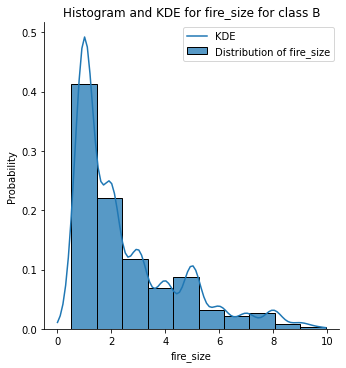

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'B'

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

df_sampled = df.loc[df['fire_size_class'] == s_c].reset_index()

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=100)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 10)

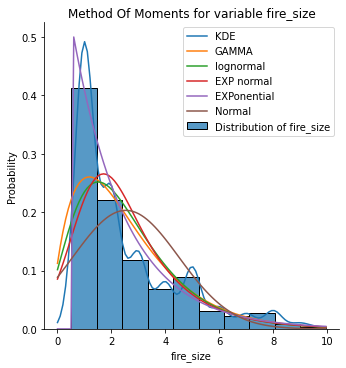

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.14, pvalue=0.2819416298082479), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.21519999999999584, pvalue=0.24107856643020975)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.14, pvalue=0.2819416298082479), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.25659999999999883, pvalue=0.18086694132396275)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.13, pvalue=0.36818778606286096), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.20709999999999695, pvalue=0.2554688439578886)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pvalue=0.07822115797841851), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.3196749999999966, pvalue=0.11943544458614652)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18,

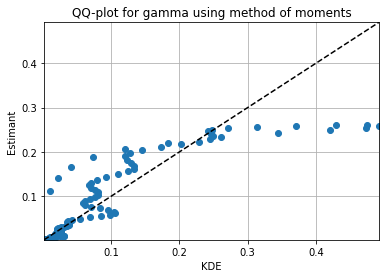

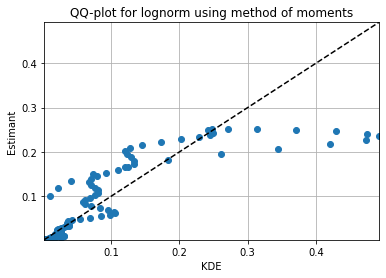

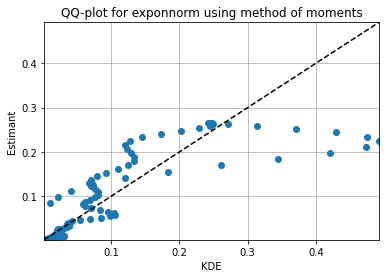

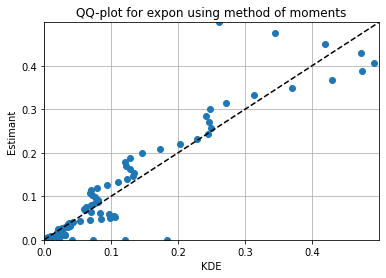

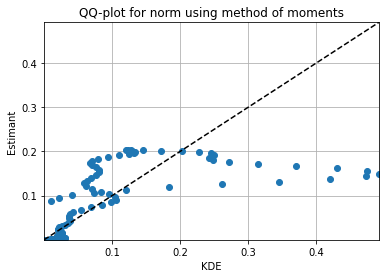

In [5]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 10)

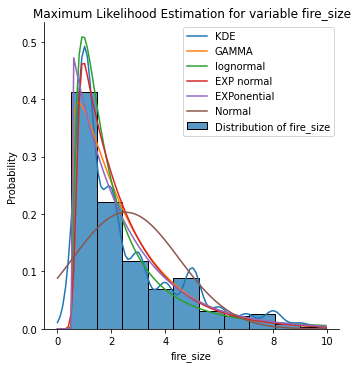

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.19, pvalue=0.05390207893129876), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.3588749999999976, pvalue=0.09323369736724696)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.22, pvalue=0.015577131622877688), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5423999999999936, pvalue=0.031116938088033064)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.19, pvalue=0.05390207893129876), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.3663999999999987, pvalue=0.08896823749746285)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.17, pvalue=0.11119526053829192), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.2800749999999965, pvalue=0.15455182070544382)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.1

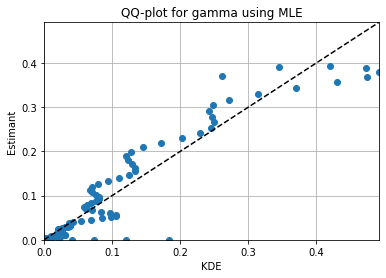

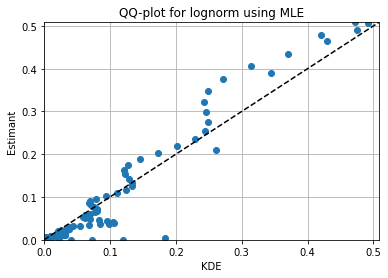

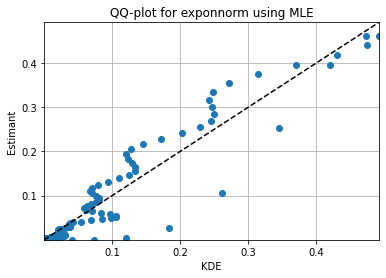

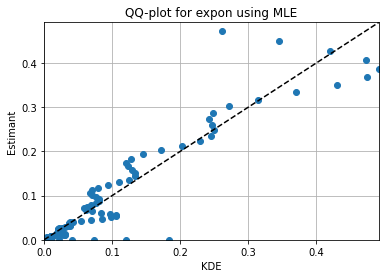

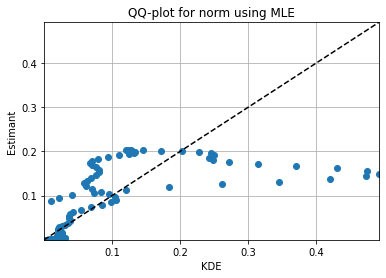

In [6]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 10)

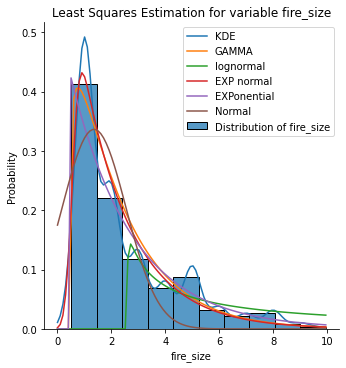

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.19, pvalue=0.05390207893129876), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.38639999999999475, pvalue=0.07863328904619704)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.32, pvalue=6.281176788972264e-05), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.710524999999997, pvalue=5.6521161067801806e-05)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.18, pvalue=0.07822115797841851), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.31059999999999377, pvalue=0.12660929114632513)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.11, pvalue=0.5830090612540064), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.08619999999999806, pvalue=0.6625634119426455)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=

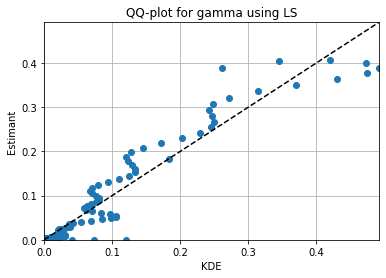

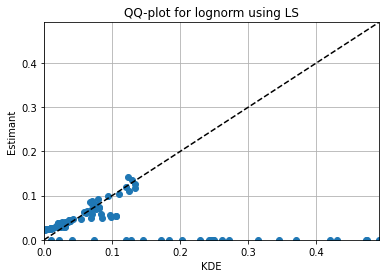

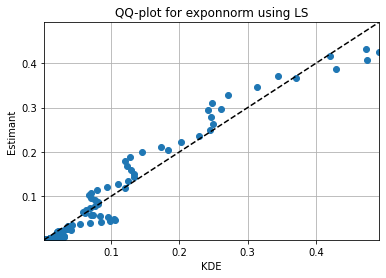

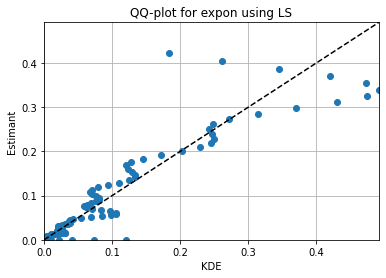

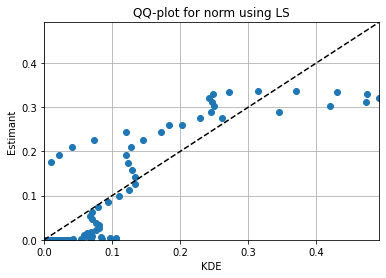

In [7]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 10)

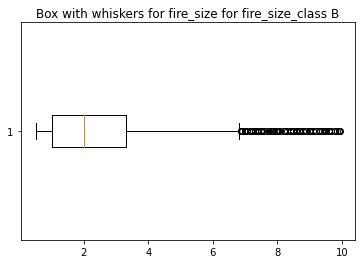

In [12]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png', bbox_inches='tight')
plt.show()